# 2 CNN Exercise
In the following, CNNs will be examined by some common tasks in the field of image processing. Be aware that CNNs can be used in various tasks where many datapoints relate locally to each other.

## 2.1 Some Imports and Preparation
The following initalizations might take some time ...

In [1]:
from ipywidgets import widgets
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np

# For some convolving operations
from scipy import signal
from scipy import misc

# DeepLearning Library Keras
# Documentation https://keras.io/
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os, sys
from typing import *

from lama.checkpoints import lama_compare_checkpoint

# allow memory to grow, not consume all at once
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Size for some plots with matplotlib
figure_inches = 3

## 2.3 Cifar-10 classification task
Beside the MNIST dataset Cifar10 is as well a small dataset used in the beginning of CNNs. There are 10 different classes of simple objects or animals. The images are of size 32x32x3. In this section, you should tune a given CNN in order to classify images with high accuracy. 

See also: [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html)


<div class="alert alert-block alert-success">
<b>Task:</b> Load the dataset, define number of classes, transform labels and define all corresponding classes (like airplane,...) according to the comments in the code cells.

</div>

In [2]:
# Load the dataset from Keras, Tip: cifar10 is already imported, train + test set required
x_train: np.ndarray
y_train: np.ndarray
x_test: np.ndarray
y_test: np.ndarray

# STUDENT CODE HERE (1 pts)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# STUDENT CODE until HERE

In [3]:
# How many classes are in Cifar-10? 
num_classes: int

### STUDENT CODE HERE (1 pts)
num_classes = y_train.max()+1

### STUDENT CODE until HERE

print(num_classes)

10


In [4]:
# Transform the labels into categorical vectors
# Use the keras.utils.to_categorical function
y_train_categorical: np.ndarray
y_test_categorical: np.ndarray

### STUDENT CODE HERE (1 pts)

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=num_classes)

### STUDENT CODE until HERE

In [5]:
# What classes are there? Define them in a list of strings named classes.
classes: List[str]

### STUDENT CODE HERE (2 pts)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### STUDENT CODE until HERE

### INTERAL BLOCK
from lama.checkpoints import lama_create_checkpoint
lama_create_checkpoint(classes, 'checkpoint2_1.pkl')
### INTERNAL BLOCK END

# compare your result with the checkpoint
lama_compare_checkpoint(classes, 't7/checkpoint2_1.pkl')

Not creating checkpoint, file already exists at checkpoints\checkpoint2_1.pkl, if you want to overwrite, set the overwrite flag!
Your data looks alright, you can continue with the workbook


True

<div class="alert alert-block alert-success">
<b>Task:</b> Check if you defined everything as required.

</div>

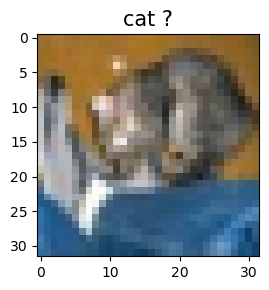

In [6]:
# Image in the training set
number_sample = 0# test multiple ones

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()


<div class="alert alert-block alert-success">
<b>Task:</b> Find a picture of a horse (not by try and error) and plot it using the code above. Use the code cell below.

</div>

13


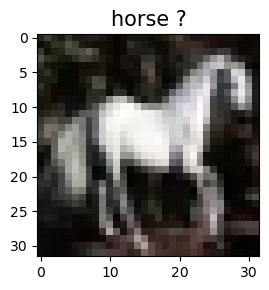

In [7]:
### STUDENT CODE HERE (1 pts)
for number_sample, i in enumerate(y_test):
    if classes[y_test[number_sample].item()] == 'horse':
        break
print(number_sample)

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()
### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> Preprocess the data to ensure values between 0 and 1 by dividing rgb values by their maximum value.

</div>

In [8]:
# Data Preprocessing

### STUDENT CODE HERE (1 pts)

print(len(x_train), len(x_test))

x_train = x_train / 255
x_test = x_test / 255

### STUDENT CODE until HERE

50000 10000


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many training and test samples are there? 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 50000 training samples & 10000 test samples
</div>

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why normalize the data?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> It ensures that each feature contributes approximately proportionately to the final prediction.
</div>

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why using a categorical vector instead of a single output?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> When you have more than two classes one output is not very useful, because a hierachy is implied which is nonsense most of the time ex: bird < horse < car
</div>

## 2.4 Classification models for CIFAR-10

### 2.4.1 Neural Network Classifier:

In [9]:
def model_nn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Flatten(name='Flattening_MLP'),
        Dense(256, activation = 'relu', name='Hidden1_NN'),
        Dense(256, activation = 'relu', name='Hidden2_NN'),
        Dense(num_classes, activation = 'softmax', name='Output_NN')
    ])

### 2.4.2 Convolutional Neural Network Classifier:

In [10]:
def model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters= 16, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool1'),
        Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation = 'relu', name='FC-1'),
        Dense(num_classes, activation = 'softmax', name='Output_CNN')
    ])

### 2.4.3 Comparison of MLP and CNN Classifiers:


<div class="alert alert-block alert-success">
<b>Task:</b> In order to classify the images in Cifar-10, use the given MLP and CNN models to examine which one performs better.
Train both networks for 10 epochs and look at the results.
Feel free to use and change the code in the two code cells down below. If your network does not train, you might have not prepared the rgb-values in the right way (For example: You did not normalize or you did it too often).
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Structure of code cells below
<ul>
<li> Use the predefined functions to create your model
<li> Define the common TensorBoard logger with the configuration to look at training results later on
<li> Compile and fit the model
<li> Hint: If your models do not learn anything, check your data normalization. You might have not normalized your data or too often.
</li>


</ul>


</div>

In [11]:
# Method for plotting the accuracy history from the model training history
def plot_metric_history(history: tf.keras.callbacks.History, metric: str):
    n_epochs = len(history[metric])

    plt.plot(range(1, n_epochs + 1), history[metric], label=f'train {metric}')
    plt.plot(range(1, n_epochs + 1), history[f'val_{metric}'], label=f'validation {metric}')
    plt.legend()
    plt.title(f'Training and validation {metric} for {n_epochs} epochs of training.')
    plt.show()

Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 1.8521 - accuracy: 0.3330 - val_loss: 1.7219 - val_accuracy: 0.3793
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 1.6567 - accuracy: 0.4060 - val_loss: 1.6384 - val_accuracy: 0.4165
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5826 - accuracy: 0.4348 - val_loss: 1.5983 - val_accuracy: 0.4266
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5268 - accuracy: 0.4568 - val_loss: 1.5808 - val_accuracy: 0.4332
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4866 - accuracy: 0.4688 - val_loss: 1.5089 - val_accuracy: 0.4654
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4543 - accuracy: 0.4824 - val_loss: 1.4659 - val_accuracy: 0.4834
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4269 - accuracy: 0.4913 - val_loss: 1.4673 - val_accuracy: 0.4766
Epoch 

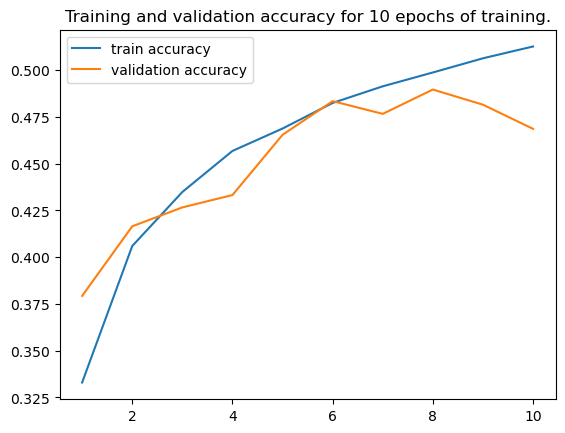

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flattening_MLP (Flatten)    (None, 3072)              0         
                                                                 
 Hidden1_NN (Dense)          (None, 256)               786688    
                                                                 
 Hidden2_NN (Dense)          (None, 256)               65792     
                                                                 
 Output_NN (Dense)           (None, 10)                2570      
                                                                 
Total params: 855050 (3.26 MB)
Trainable params: 855050 (3.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the Neural Network (MLP)

nn_model = model_nn()
config_nn = 'MLP' # Give a recognizable name

# The TensorBoard is a feature of tensorflow for the visualization of the training process 
nn_logger = TensorBoard(log_dir='logs/nn_logs/'+config_nn+'/')

nn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
history = nn_model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, 
                       validation_data=(x_test, y_test_categorical), 
                       callbacks=[nn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')

nn_model.summary()

<div class="alert alert-block alert-success">
<b>Task:</b> Use TensorBoard to control your training progress. An explanation on how to open your TensorBoard is given here:
    <a href="https://github.com/tensorflow/tensorboard/blob/master/docs/r1/summaries.md">TensorBoard</a>  (at the bottom of the webpage)
</div>

Epoch 1/10
782/782 [==============================] - 20s 24ms/step - loss: 1.4392 - accuracy: 0.4833 - val_loss: 1.2422 - val_accuracy: 0.5550
Epoch 2/10
782/782 [==============================] - 19s 24ms/step - loss: 1.0996 - accuracy: 0.6138 - val_loss: 1.0502 - val_accuracy: 0.6343
Epoch 3/10
782/782 [==============================] - 18s 24ms/step - loss: 0.9673 - accuracy: 0.6606 - val_loss: 1.0095 - val_accuracy: 0.6464
Epoch 4/10
782/782 [==============================] - 19s 24ms/step - loss: 0.8736 - accuracy: 0.6934 - val_loss: 0.9890 - val_accuracy: 0.6607
Epoch 5/10
782/782 [==============================] - 18s 24ms/step - loss: 0.7864 - accuracy: 0.7259 - val_loss: 0.8943 - val_accuracy: 0.6924
Epoch 6/10
782/782 [==============================] - 18s 24ms/step - loss: 0.7142 - accuracy: 0.7507 - val_loss: 0.9038 - val_accuracy: 0.6985
Epoch 7/10
782/782 [==============================] - 18s 24ms/step - loss: 0.6407 - accuracy: 0.7768 - val_loss: 0.8881 - val_accuracy:

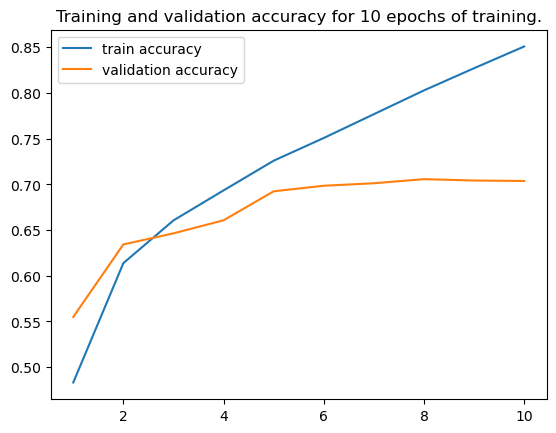

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 32, 32, 16)        448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 16, 16, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 16, 16, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 8, 8, 32)          0         
                                                                 
 Flatt_CNN (Flatten)         (None, 2048)              0         
                                                                 
 FC-1 (Dense)                (None, 256)               524544    
                                                                 
 Output_CNN (Dense)          (None, 10)               

In [13]:
# Train the CNN

cnn_model = model_cnn()
config_cnn = 'CNN' # give a recognizable name

cnn_logger = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn+'/') 

cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
history = cnn_model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, 
                        validation_data=(x_test, y_test_categorical), 
                        callbacks=[cnn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')


cnn_model.summary()

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Which network performs better?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> The cnn performs better: val_accuracy: 0.6987 compared to val_accuracy: 0.4770
</div>

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many parameters do the networks have? Therefore use the summary method (see Keras-Docs)...
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> nn: 855050; cnn: 532202
</div>

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Where are most parameters stored in this CNN?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> FC-1   -   524544
</div>

### 2.4.4 Challenge: Optimize the Network! 

<div class="alert alert-block alert-success">
<b>Task:</b> Try to improve one of the models so that your validation accuracy is higher than 0.75 percent once!

<ul>
<li>Hint: Try to overfit first and then regularize. 
<li>Hint2: Therefore use L1/L2 - regularization and/or Dropout. BatchNormalization might improve things as well. Look therefore at Keras website for examples or ask tutors.
<li>Hint3: Use one of the functions <code>def model_nn()</code> or <code>def model_cnn()</code> from above. Have fun and good Luck!

</li>
</ul>
</div>

Epoch 1/10
391/391 [==============================] - 47s 117ms/step - loss: 2.2264 - accuracy: 0.3609 - val_loss: 5.1791 - val_accuracy: 0.2335
Epoch 2/10
391/391 [==============================] - 46s 117ms/step - loss: 1.6725 - accuracy: 0.5090 - val_loss: 1.4045 - val_accuracy: 0.5992
Epoch 3/10
391/391 [==============================] - 47s 119ms/step - loss: 1.4448 - accuracy: 0.5796 - val_loss: 1.2904 - val_accuracy: 0.6227
Epoch 4/10
391/391 [==============================] - 46s 118ms/step - loss: 1.3255 - accuracy: 0.6200 - val_loss: 1.1667 - val_accuracy: 0.6837
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 1.2526 - accuracy: 0.6484 - val_loss: 1.1108 - val_accuracy: 0.7037
Epoch 6/10
391/391 [==============================] - 46s 117ms/step - loss: 1.2011 - accuracy: 0.6705 - val_loss: 1.1615 - val_accuracy: 0.6858
Epoch 7/10
391/391 [==============================] - 46s 117ms/step - loss: 1.1730 - accuracy: 0.6833 - val_loss: 1.3360 - val_ac

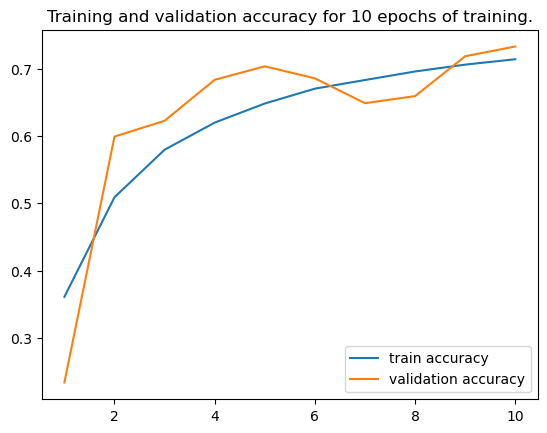

In [14]:
# Use this block to train the optimized Network.
# You can copy and paste code from above
# You might also want to look online for good training strategies

### STUDENT CODE HERE (8 pts)

def my_model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv1'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv2', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Dropout(0.25),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv3'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv4', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Dropout(0.25),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])

cnn_model = my_model_cnn()
config_cnn = 'Torsten' # give a recognizable name

cnn_logger = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn+'/') 

cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),)

history = cnn_model.fit(x_train, y_train_categorical, batch_size=128, epochs=10, 
                        validation_data=(x_test, y_test_categorical), 
                        callbacks=[cnn_logger], verbose=1)

plot_metric_history(history.history, 'accuracy')

### STUDENT CODE until HERE


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Describe briefly what you did to improve your network? Name two things.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> reached val_accuracy: 0.7537 </br>
    More convolutional layers to overfit; regularizers, batchnormalizers, pooling and dropout to counter overfitting, smaller learning rate of 0.001 </br>
    Note: The printed val_accuracy varies because the sheet was worked on over several days, so it had to retrein everything to set up the python kernel for later tasks.
</div>

## 2.5 Data Augmentation

Another way to regularize your network is to augment the training data. Use therefore the ImageDataGenerator from Keras. We will later shift and rotate images by ourselves after optimizing on Cifar-10.

In [15]:
# Keras ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

### 2.5.1 Even more challenging ((Bonus Question :)))

<div class="alert alert-block alert-success">
<b>Task:</b> Improve your model and adapt it, how accurate can it get now?
Our solution is able to reach 0.8894 on the validation accuracy.
</div>

In [16]:
def model_cnn_aug() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv1'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv2'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1'),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])

In [17]:
def my_model_cnn_aug() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv11'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv12', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Dropout(0.25),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv21'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv22', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Dropout(0.25),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])

Epoch 1/10
391/391 [==============================] - 31s 78ms/step - loss: 1.7494 - accuracy: 0.3640 - val_loss: 1.4846 - val_accuracy: 0.4718
Epoch 2/10
391/391 [==============================] - 31s 79ms/step - loss: 1.5089 - accuracy: 0.4543 - val_loss: 1.3241 - val_accuracy: 0.5274
Epoch 3/10
391/391 [==============================] - 32s 81ms/step - loss: 1.4073 - accuracy: 0.4935 - val_loss: 1.2458 - val_accuracy: 0.5507
Epoch 4/10
391/391 [==============================] - 31s 80ms/step - loss: 1.3482 - accuracy: 0.5186 - val_loss: 1.2330 - val_accuracy: 0.5639
Epoch 5/10
391/391 [==============================] - 31s 79ms/step - loss: 1.2864 - accuracy: 0.5385 - val_loss: 1.1495 - val_accuracy: 0.5983
Epoch 6/10
391/391 [==============================] - 31s 79ms/step - loss: 1.2412 - accuracy: 0.5560 - val_loss: 1.0729 - val_accuracy: 0.6230
Epoch 7/10
391/391 [==============================] - 31s 80ms/step - loss: 1.2091 - accuracy: 0.5696 - val_loss: 1.0575 - val_accuracy:

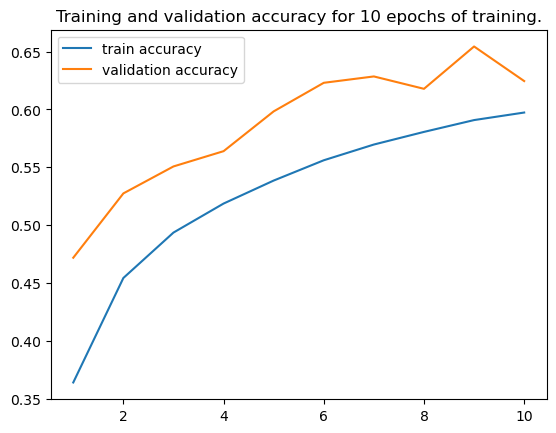

In [18]:
# Train your model that makes use of data augmentation
# Fit the training data to the data-generator
datagen.fit(x_train)

# Train your CNN_augmentation model:
cnn_aug_model = model_cnn_aug()
cnn_aug_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
config_cnn_aug = 'AugmentedCNN' # give a recognizable name
cnn_logger = TensorBoard(log_dir='logs/cnn_aug_logs/'+config_cnn_aug+'/') 

history = cnn_aug_model.fit(datagen.flow(x_train, y_train_categorical, batch_size=128),
                            epochs=10, validation_data=(x_test, y_test_categorical),
                            callbacks=[cnn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Can you imagine why the ground-truth labels were not augmented in the code cell above and might that be necessary? If the intuition is missing you might come back to this question after you finished the notebook or the implementation of data augmentation down below.  
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> During augmentation, we don't increase the sample size to save space. We just generate more variabilty by altering the pictures. Since we alter the pictures in place and don't add new ones, the labels y stay the same.
</div>

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> What do you think happens to images adapted by the DataGenerator?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> The images are altered with random values. Alterations include: rotation, width shift, height shift, horizontal flip.
</div>

## 2.6 Predict with your model

In [19]:
# Get the probabilities of one image prediction
x_tester = x_test[0,:,:,:]

# Use numpy expand_dims before predicting with your model
# Print your predicted classes for the first test image (x_test[0,:,:,:])

# STUDENT CODE HERE (2 pts)

x_tester_batch = np.expand_dims(x_tester, axis=0)
pred = cnn_aug_model.predict(x_tester_batch)

print(f"Predicted class: {classes[pred.argmax()]}, with probability of: {pred.flatten()[pred.argmax()]}")

x_tester_batch_question = np.expand_dims(x_test[17,:,:,:], axis=0)
pred_question = cnn_aug_model.predict(x_tester_batch)
#print(f"Answer:\nPredicted class: bird, with probability of: {pred_question.flatten()[classes.index("bird")]}")
bird_index = classes.index("bird")
print(f"Answer: class bird with probability of { pred_question.flatten()[bird_index] }")

# STUDENT CODE until HERE


1/1 [==============================] - 0s 85ms/step
Predicted class: cat, with probability of: 0.5527438521385193
1/1 [==============================] - 0s 17ms/step
Answer: class bird with probability of 0.0058423294685781


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> With how much confidence was image <b>18</b> (index 17) in the test set predicted as a bird by your model?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> class bird with probability of 0.013495790772140026
</div>

## 2.7 Let's have a closer look / Get the weights in a convolutional layer

In [20]:
# Get the weights of a layer of one of your models, you specified by name
layer_visual = cnn_model.get_layer('Conv1')
weights = layer_visual.get_weights()[0]
        
# Take some of them, last dimension are the channels
weights_2d = weights[:,:,0,0] # filters are [:,:, dimension of spatial input (e.g.: rgb=3), nb_filters] in a layer
print(weights.shape)
weights_2d

(3, 3, 3, 16)


array([[ 0.19030245, -0.05143221, -0.10210698],
       [ 0.15821066, -0.2993709 ,  0.18435027],
       [ 0.20915215, -0.11489922, -0.06747024]], dtype=float32)

<div class="alert alert-block alert-success">
<b>Task:</b> Look at layer Conv2 (or another layer than conv1) and plot one filter-kernel-slice of it's 3rd filter. Hint: Use weights.shape to understand the kernel's dimensions.
</div>

In [21]:
# Copy and paste necessary code for this Task from above.
### STUDENT CODE HERE (1 pts)
layer = cnn_model.get_layer("Conv2")
weights = layer.get_weights()[0] # zero index -> trainable weights
print(f"Shape of layer weights: {weights.shape}")
third_filter_kernel_slice = weights[:,:,0,2]
print(f"Third filter weights:\n{third_filter_kernel_slice}")

### STUDENT CODE until HERE


Shape of layer weights: (3, 3, 16, 16)
Third filter weights:
[[-0.10922305  0.00681671  0.01517355]
 [-0.00138966  0.10825534  0.13695104]
 [-0.11567096  0.04975163  0.03948811]]


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Explain what the dimensions a,b,c and d are in 'weights[a,b,c,d]' like it is used in the code block above. 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> </br>
a: filter height -> as specified in Conv2D Constructor</br>
b: filter width -> as specified in Conv2D Constructor</br>
c: input channels -> depends on output of previous layer</br>
d: number of filters -> as specified in Conv2D Constructor

</div>

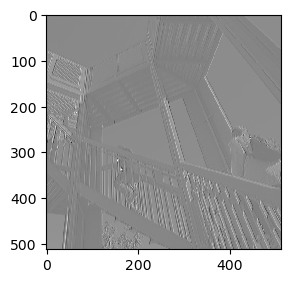

In [22]:
#Load Ascent image from scipy and convolve it with the previous loaded filter
import scipy.datasets
import scipy.signal

ascent = scipy.datasets.ascent()
ascent = scipy.signal.convolve2d(ascent, weights_2d, boundary='symm', mode='same')
# ascent = np.maximum(ascent, 0)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.imshow(ascent, interpolation='nearest', cmap='gray')
plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Task:</b> Use different filters on the input image. Can you notice any differences? (A few words)
</div>

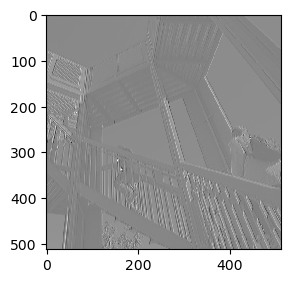

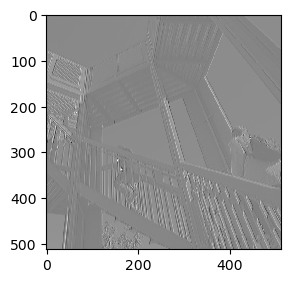

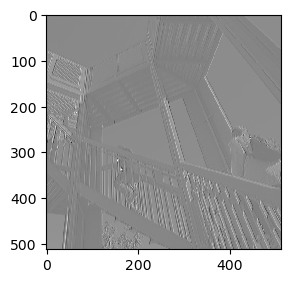

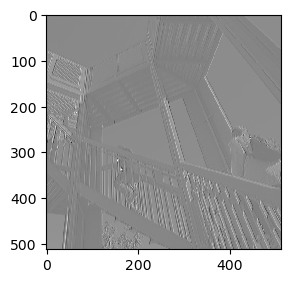

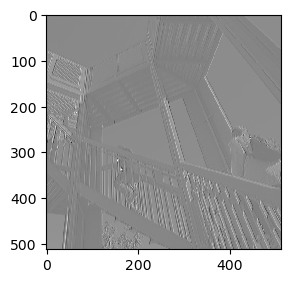

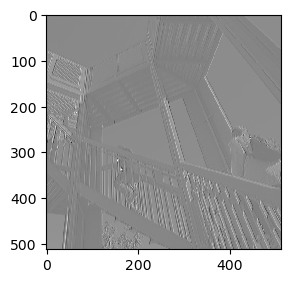

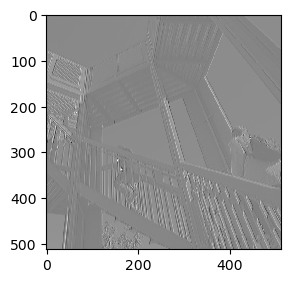

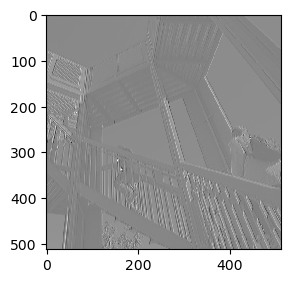

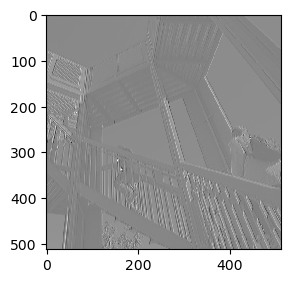

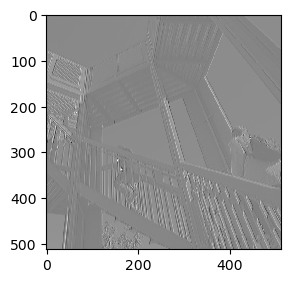

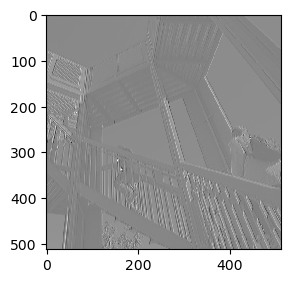

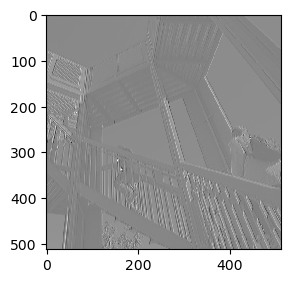

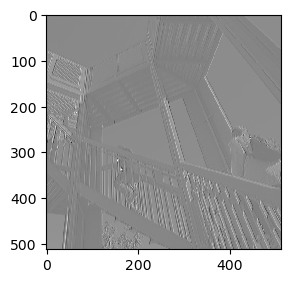

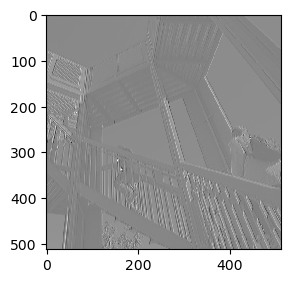

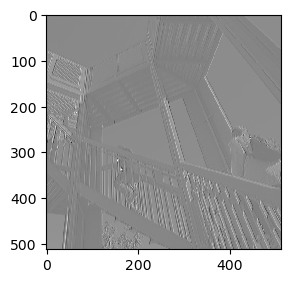

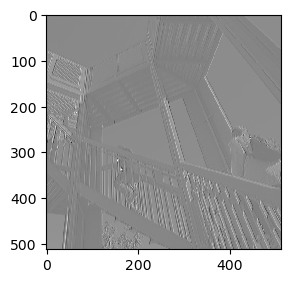

In [34]:
# Copy and paste the code from above. And use different filters.

# STUDENT CODE HERE (3 pts)

conv_names = ["Conv1", "Conv2", "Conv3", "Conv4"]

for conv_name in conv_names:
    for i in range(16):
        layer = cnn_model.get_layer(conv_name)
        weights = layer.get_weights()[0] # zero index -> trainable weights

        filter_kernel_slice = weights[:,:,0,i]

        # only convolve and plot every 4th filter -> less pictures produced
        if(i % 4 == 0):
            ascent = scipy.datasets.ascent()
            ascent = scipy.signal.convolve2d(ascent, weights_2d, boundary='symm', mode='same')
            # ascent = np.maximum(ascent, 0)
            fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
            ax.imshow(ascent, interpolation='nearest', cmap='gray')
            plt.tight_layout()

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Explain briefly what you changed in the pasted code.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> We convoluted the picture with every fourth filter in every convolutional layer. It is hard to notice any difference.
</div>

## 2.8 Visualize the activation in a feedforward pass

In the following code we will directly use the output of the convolutional layer in the CNN and visualize it. This is approximately the same as we did above.  

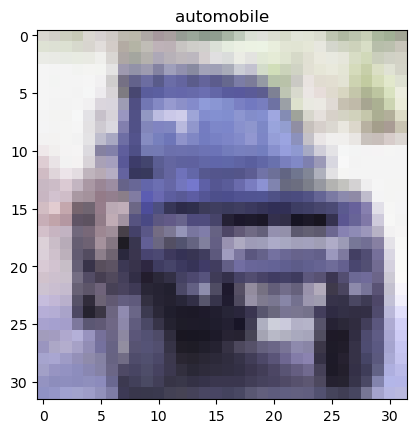

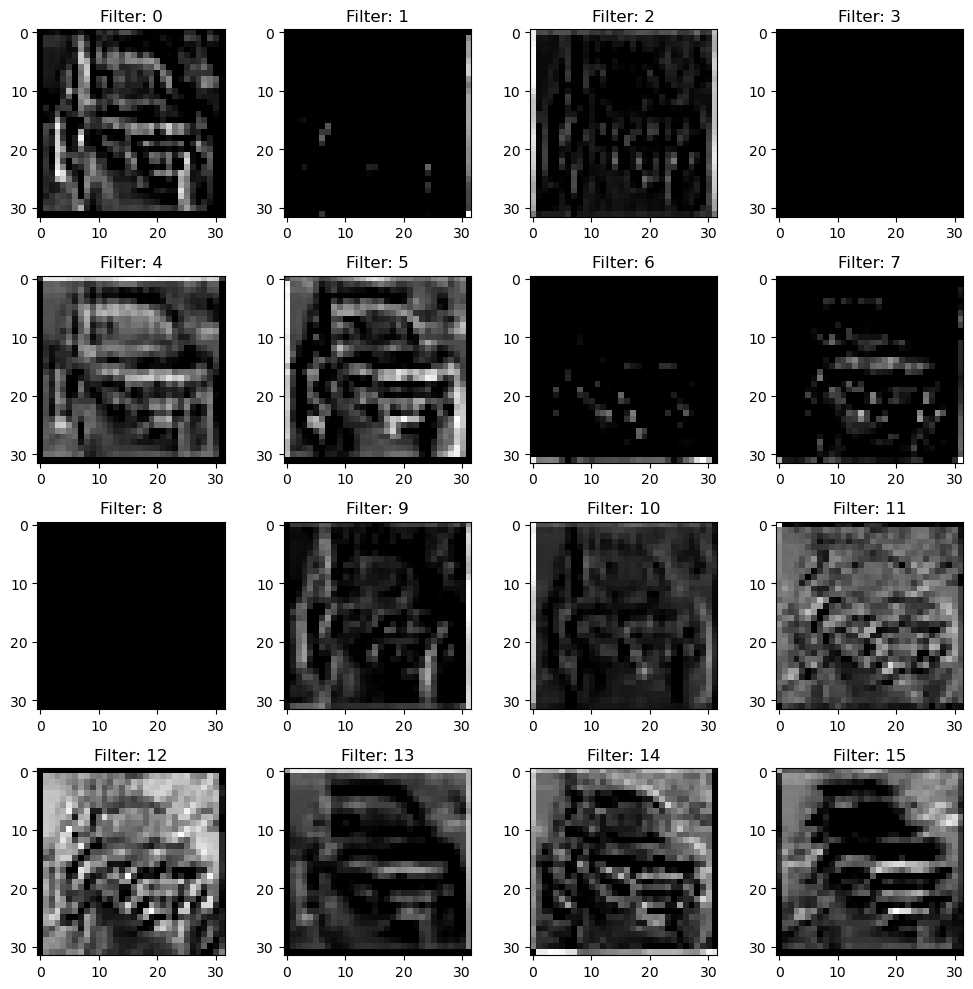

In [35]:
# Get the output in a feedforward process from a model with get_output function
number_sample = 9

def get_output(model, layer_name, model_input):
    """Function to set model into learning phase and get
    model activations after feedforward pass to visualize activations"""

    partial_model = keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    # this may not work with TF version 1
    return partial_model([model_input])

# Model and layer where the feature maps come from
feature_map = get_output(cnn_model, 'Conv1', np.expand_dims(x_test[number_sample,:,:,:],axis=0))

# Frist print sample
plt.imshow(x_test[number_sample,:,:,:])
plt.title(classes[y_test[number_sample].item()])

# Now plot all filters
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
axes = ax.flatten()

# Note: it only works for 16 filters, if you want to doodle nrows * ncols
for i, ax in enumerate(axes):
    ax.imshow(feature_map[0,:,:,i], cmap='gray')
    ax.set_title(f"Filter: {i}")

fig.tight_layout()
plt.show()


## Further Reading

[SegmentationForAutonomousDriving](https://blog.playment.io/semantic-segmentation-models-autonomous-vehicles/#U-Net)

[Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

[BatchNormalization](https://arxiv.org/pdf/1502.03167.pdf)

# Feedback and Recap

<div class="alert alert-block alert-success">
<b>Question (2pt):</b>  Please conclude in a few sentences what you learned in this exercise
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> The goal in this exercise was to classify pictures into 10 different classes, according to what they were showing. First we prepared the data. Then we trained the Neural Network and Convolutional Neural Network and compared their performance by validating the models with test data. Turns out, CNNs perform better on image classification. We played around with the CNN by manipulating some layers - adding more layers and layer types - and parameters to get a better validation score. Afterwards we took a closer look into the model, by accessing some filters of some layers and using them to convolute other pictures.
</div>

## And give us feedback if you like


1) Do you think this task was designed well? 

2) Where can we improve this task?

<strong>Thanks for participating in LAMA! :)</strong>